## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
list_1 = np.load('average_ratings.npy')

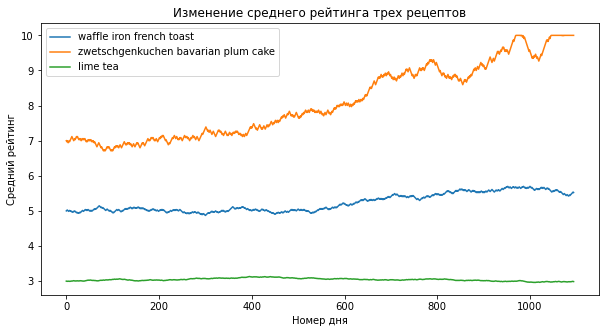

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,5))


ax.plot(np.arange(0, len(list_1[0])), list_1[0], label='waffle iron french toast')
ax.plot(np.arange(0, len(list_1[1])), list_1[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(np.arange(0, len(list_1[2])), list_1[2], label='lime tea')
        
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.legend(loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [5]:
list_data = pd.date_range(start='1.01.2019', end='30.12.2021', freq='D')

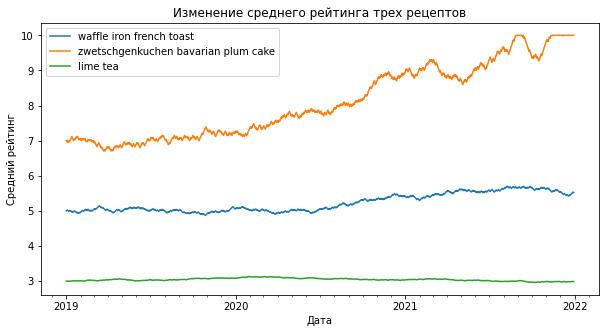

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,5))


ax.plot(list_data, list_1[0], label='waffle iron french toast')
ax.plot(list_data, list_1[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(list_data, list_1[2], label='lime tea')

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.legend(loc='upper left')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

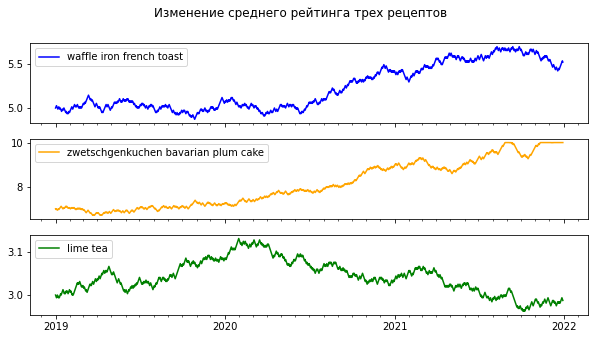

In [7]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(3,1, figsize=(10,5))

fig.suptitle('Изменение среднего рейтинга трех рецептов')


ax_1.plot(list_data, list_1[0], c='blue', label='waffle iron french toast')
ax_1.xaxis.set_major_locator(mdates.YearLocator())
ax_1.xaxis.set_minor_locator(mdates.MonthLocator())
ax_1.set_xticklabels([])
ax_1.legend(loc='upper left')

ax_2.plot(list_data, list_1[1], c='orange', label='zwetschgenkuchen bavarian plum cake')
ax_2.xaxis.set_major_locator(mdates.YearLocator())
ax_2.xaxis.set_minor_locator(mdates.MonthLocator())
ax_2.set_xticklabels([])
ax_2.legend(loc='upper left')

ax_3.plot(list_data, list_1[2], c='green', label='lime tea')
ax_3.xaxis.set_major_locator(mdates.YearLocator())
ax_3.xaxis.set_minor_locator(mdates.MonthLocator())
ax_3.legend(loc='upper left');

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [8]:
visitors_list = np.load('visitors.npy')

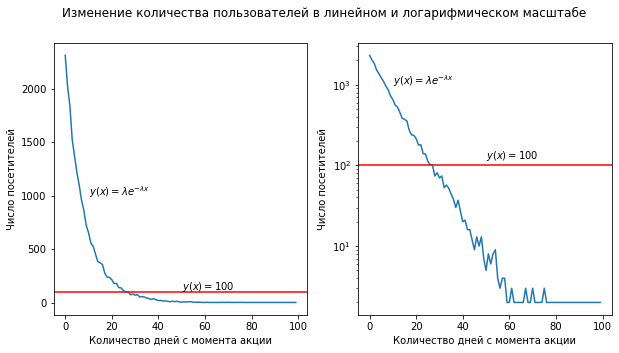

In [9]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

ax1.plot(np.arange(0,len(visitors_list)),visitors_list)
ax1.axhline(y=100, c='r')
ax1.text(10, 1000, '$y(x)=\lambda e^{-\lambda x}$')
ax1.text(50, 120, '$y(x)=100$')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')

ax2.plot(np.arange(0,len(visitors_list)), visitors_list)
ax2.axhline(y=100, c='r')
ax2.set_yscale('log')
ax2.text(10, 1000, '$y(x)=\lambda e^{-\lambda x}$')
ax2.text(50, 120, '$y(x)=100$')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей');

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [11]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [12]:
recipe_duration = [] 
for i in recipes['minutes']:
    if i < 5:
        recipe_duration.append('Короткий')
    elif i >= 5 and i < 50:
        recipe_duration.append('Средний')
    else:
        recipe_duration.append('Длинный')       

In [13]:
recipes['recipe_duration']=recipe_duration
recipes_grp = recipes.groupby('recipe_duration').describe()

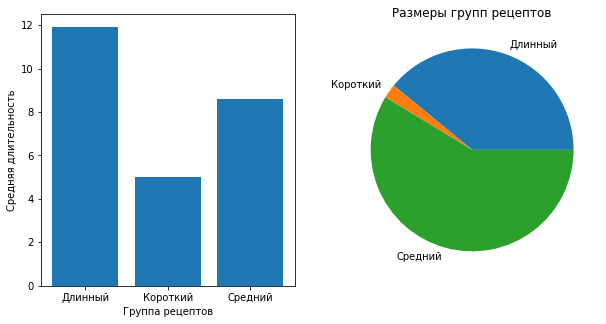

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.bar(['Длинный', 'Короткий', 'Средний'], list(recipes_grp['n_steps']['mean']))
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

ax2.pie(list(recipes_grp['id']['count']), labels=['Длинный', 'Короткий', 'Средний'])
ax2.set_title('Размеры групп рецептов');

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [15]:
reviews['date']=pd.to_datetime(reviews['date'])

In [16]:
rating_list = list(reviews['rating'][(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)])
year_list = list(reviews['date'].dt.year[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)])

df1 = pd.DataFrame({'Рейтинг': rating_list, 'Год': year_list})

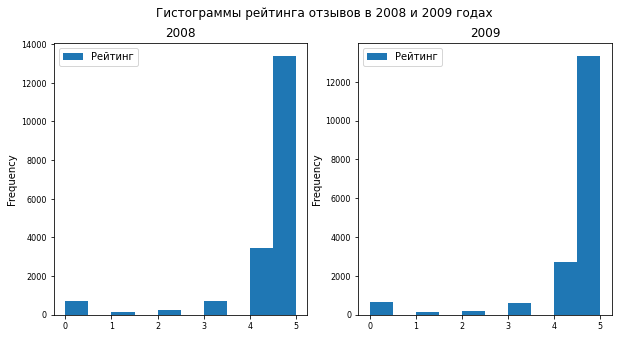

In [17]:
ax = df1.plot.hist(column=["Рейтинг"], 
                   by="Год", 
                   figsize=(10, 5),
                   layout=(1,2), 
                   fontsize=8, 
                   title='Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

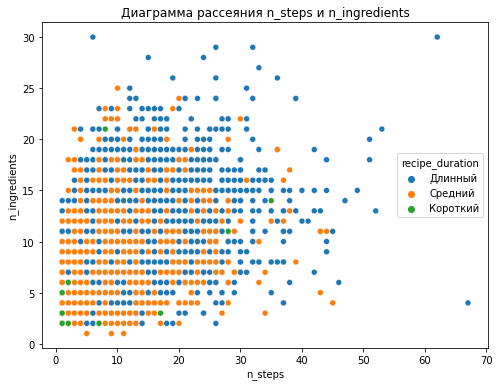

In [18]:
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='n_steps', 
                y='n_ingredients',
                hue='recipe_duration',
                data=recipes
               );
scatterplot.set_title('Диаграмма рассеяния n_steps и n_ingredients');

Мне кажется, что линейная зависимотсть между переменной n_steps и n_ingredients не наблюдается, так как разброс большой

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

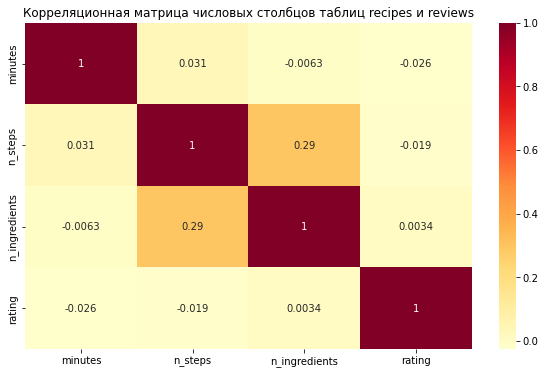

In [19]:
df = reviews.merge(recipes, how='left', left_on ='recipe_id', right_on='id')

plt.figure(figsize=(10, 6)) 
heatmap = sns.heatmap(df[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr(), annot=True, cmap='YlOrRd') 
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');